In [51]:
import core.model as model
import core.data as data
import core.util as util
import matplotlib.pyplot as plt
import math

In [53]:
def main(input_output_type: str,
         N: int,
         DMUs: int,
         input_idx: int):
    
    # Setting
    passing_dataset = []
    total = N
    
    while len(passing_dataset) < total:
        # get Data
        single_data = data.generate(DMUs, type=input_output_type, input_idx=input_idx)

        # get NDEA results
        res_NDEA_CRS, label_CRS = model.NDEA(single_data, model_type="CRS")
        res_NDEA_VRS, label_VRS = model.NDEA(single_data, model_type="VRS")
        
        if all(x == True for x in label_CRS + label_VRS):
            # Save result
            passing_dataset.append(single_data)
            print(f"\r{len(passing_dataset)}/{total}")

            # get DEA results
            res_DEA_CRS, _ = model.DEA(single_data, model_type="CRS")
            res_DEA_VRS, _ = model.DEA(single_data, model_type="VRS")

            result = {'NDEA_CRS': res_NDEA_CRS,
                      'NDEA_VRS': res_NDEA_VRS,
                      'DEA_CRS':  res_DEA_CRS,
                      'DEA_VRS':  res_DEA_VRS}
 
            for k, v in result.items():
                print(k, v)
                
            util.plot_fig(input_output_type,
                          res_NDEA_CRS,
                          res_NDEA_VRS,
                          res_DEA_CRS,
                          res_DEA_VRS
                          )

    return passing_dataset, result


### Basic setting

In [54]:
# number of sample
N = 2

# number of DMUs
DMUs = 5

# setting of input type
'''
    age = random.randint(1, 179)
    risk = random.randint(1, 50)
    size = random.randint(5000, 9999)  # 5000–9999
'''
input_idx = 0


1/2
[0.29236144578317225, 1.0, 0.4582857142856981, 1.0, 0.5572571428571396]
[0.29236144578317225, 1.0, 1.0, 1.0, 1.0]
NDEA_CRS [0.8344896660888985, 0.8856190476190476, 0.8459454796411319, 0.9673611111111111, 0.8683323717806477]
NDEA_VRS [0.8403573315071257, 0.9936, 0.9586956521739131, 1.0, 0.9435414725069897]
DEA_CRS [0.29236144578317225, 1.0, 0.4582857142856981, 1.0, 0.5572571428571396]
DEA_VRS [0.29236144578317225, 1.0, 1.0, 1.0, 1.0]


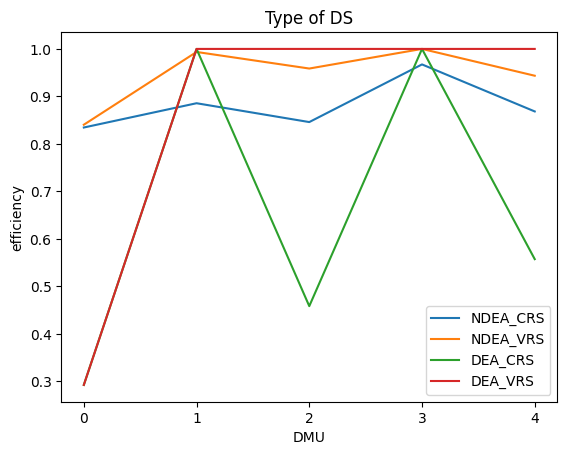

2/2
[0.45926754385961255, 0.9648515625, 1.0, 0.8775978260869761, 1.0]
[0.5248771929824468, 1.0, 1.0, 1.0, 1.0]
NDEA_CRS [0.8484706654754169, 0.8956253750068183, 0.9132316630355846, 0.9263068697475452, 0.933419216317767]
NDEA_VRS [0.9101408904204957, 0.9455026455026455, 0.9953623188405797, 0.9583472355627454, 0.9842105263157894]
DEA_CRS [0.45926754385961255, 0.9648515625, 1.0, 0.8775978260869761, 1.0]
DEA_VRS [0.5248771929824468, 1.0, 1.0, 1.0, 1.0]


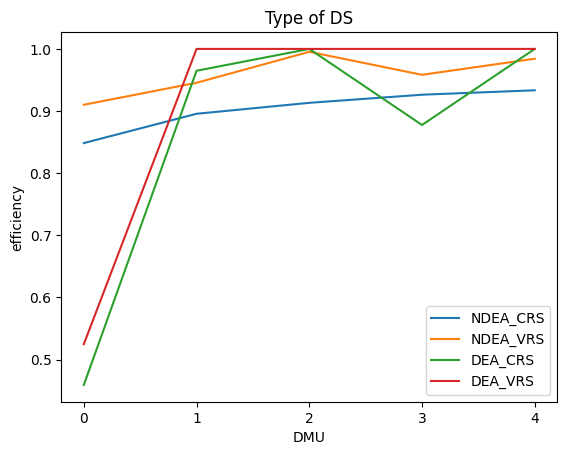

In [55]:
# DS: different input; same output 
passing_dataset_DS, result_DS = main("DS", N, DMUs, input_idx)

1/2
[1.0, 0.18518518518521887, 0.15494393476046753, 0.33333333333337123, 0.11557177615566161]
[1.0, 1.0, 0.17431192660546913, 0.33333333333337123, 0.13868613138686214]
NDEA_CRS [1.0, 0.8345679012345679, 0.8295039075773021, 0.9098888888888889, 0.8285385239253853]
NDEA_VRS [1.0, 0.8888888888888888, 0.8406727828746177, 0.9111111111111111, 0.8416058394160584]
DEA_CRS [1.0, 0.18518518518521887, 0.15494393476046753, 0.33333333333337123, 0.11557177615566161]
DEA_VRS [1.0, 1.0, 0.17431192660546913, 0.33333333333337123, 0.13868613138686214]


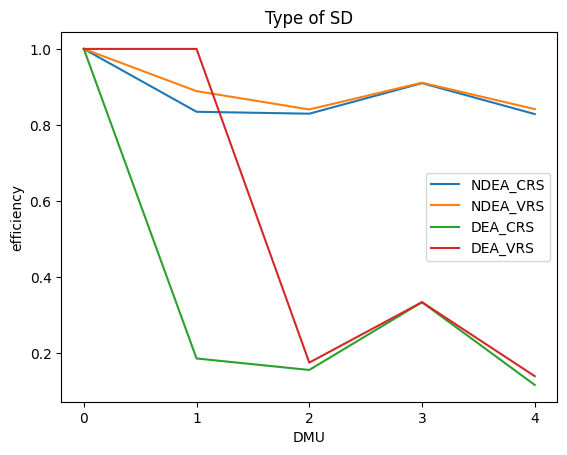

2/2
[0.5296703296703527, 0.5714285714285552, 0.796875, 1.0, 1.0]
[0.5538461538461661, 0.6428571428571104, 0.8999999999999773, 1.0, 1.0]
NDEA_CRS [0.8993568376068376, 0.9225, 0.9341145833333333, 0.976986301369863, 0.9996180555555556]
NDEA_VRS [0.9112564102564102, 0.9741666666666666, 0.9807916666666666, 0.9997716894977169, 1.0]
DEA_CRS [0.5296703296703527, 0.5714285714285552, 0.796875, 1.0, 1.0]
DEA_VRS [0.5538461538461661, 0.6428571428571104, 0.8999999999999773, 1.0, 1.0]


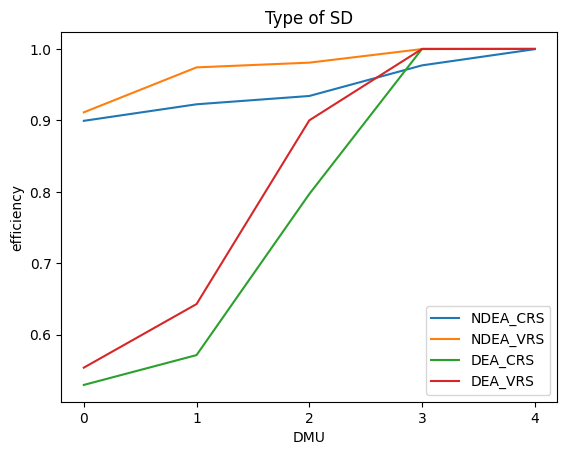

In [59]:
# SD: same input; different output 
passing_dataset_SD, result_SD = main("SD", N, DMUs, input_idx)

1/2
[1.0, 0.9421783029000913, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
NDEA_CRS: [0.985, 0.849, 0.909, 0.895, 0.872]
NDEA_VRS: [0.986, 0.938, 0.979, 0.933, 0.925]
DEA_CRS:  [1.0, 0.942, 1.0, 1.0, 1.0]
DEA_VRS:  [1.0, 1.0, 1.0, 1.0, 1.0]


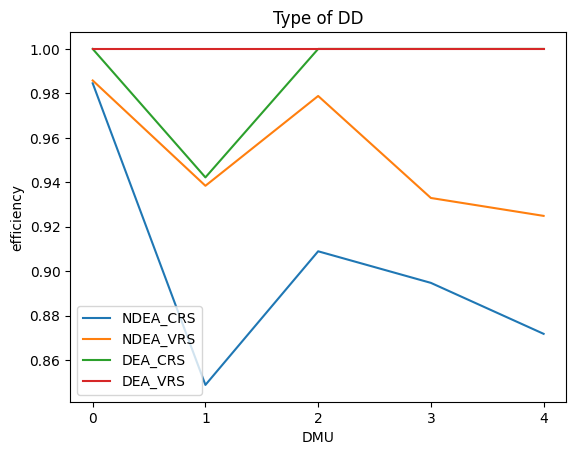

2/2
[1.0, 1.0, 0.8975942281378281, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
NDEA_CRS: [0.894, 0.89, 0.963, 0.904, 0.933]
NDEA_VRS: [0.96, 0.896, 0.998, 0.976, 0.936]
DEA_CRS:  [1.0, 1.0, 0.898, 1.0, 1.0]
DEA_VRS:  [1.0, 1.0, 1.0, 1.0, 1.0]


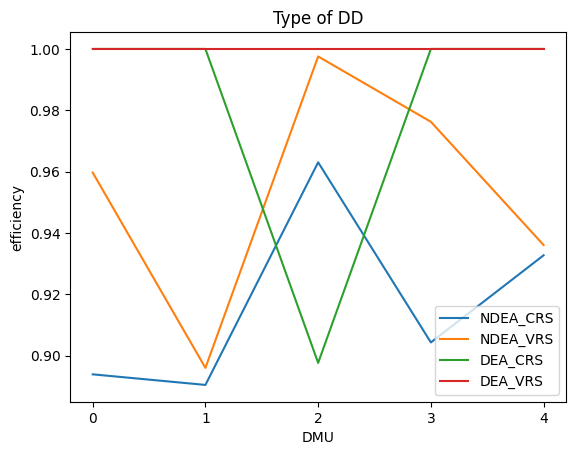

In [38]:
# DD: different input; different output 
passing_dataset_DD, result_DD = main("DD", N, DMUs, input_idx)